In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib as mpl
from scipy.optimize import curve_fit
import scipy.constants as sc
from astropy.convolution import convolve, Box1DKernel
import stacking_functions as sf

# Read in HI Data Cube.

In [2]:
# Use astropy to read in the FITS cube used for analysis.

# HI Data cube in FITS Format (ra,dec,freq,stokes).
mycube = 'mycube.fits'

hdulist = fits.open(mycube)
hi_data = hdulist[0].data[0]
hdulist.close()

# Do the Stack.

In [3]:
# Catalogue being used (id,ra,dec,z,whatever else you want, first row is a header.)
catuse = G10spec_z_chiles.txt
catdelim = '\t'

# Output of the stack.
stackout = 'myoutput.fits'

# Fetch the galaxies to stack.
cat = sf.read_catalog(catuse, 1, catdelim, (0,1,2,3,4,7,10,13), 960., 1420., True, 2.05, 2.65, 150.05, 150.65, [True, -1., 3.], [True, 9., 12.])
# Do the cubelet stacking.
stacked_cube = sf.stack_inpfile(cat, hi_data, [960., 1420.], 2, [600,600], 0.125, 150.35, 2.35, 0.)
# Create the stack as a cube.
sf.convert_stack_cube(stackout, stacked_cube,'template_45x64x64.fits')

You are attempting to stack 1574 galaxies.


# Modify Cube.

# <sup> If desired, modify the cube (smoothing, extra subtraction/baselining, etc.) using CASA. Once this is done, use the final cube, imported back into FITS form, for the following steps.

# Calculate the Stacked HI Mass.

In [4]:
# The FITS cube you are using.
myfinal = 'myfinal.fits'
# Define the emission region.
massbox = np.array([[rapixlow,rapixhigh],[decpixlow,decpixhigh],[channumlow,channumhigh]])

# Calculate the mass and error.
bin1mass = sf.HImass_calc(myfinal, massbox, 4.5, 4.5, 2.0, 52.765)

# Create Moment-0 Map and Spectrum.

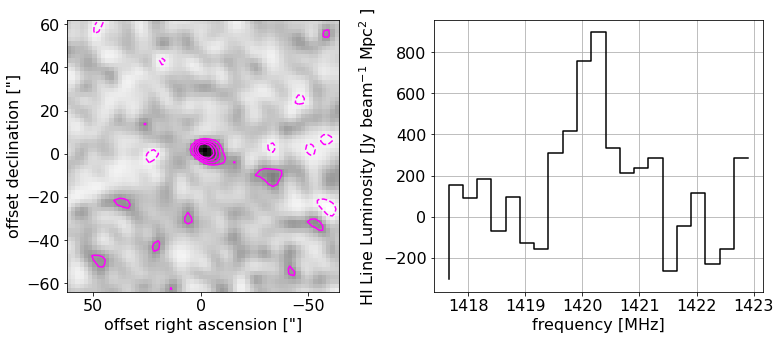

In [5]:
# Create the QA-type plots.
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (13,5)

# Do the calculations for the plots.
hdulist = fits.open('demo_final.fits')
imgdata = hdulist[0].data[0]
hdulist.close()

img = np.sum(imgdata[10:12,:,:], axis=0)
imgstd = np.std(img)
spectrum = np.sum(imgdata[:,29:35,30:36], axis=(1,2))
freq = np.linspace(1417.65575, 1422.90575, 22)
fig, ax = plt.subplots(2,1)

ax[0] = plt.subplot(1,2,1)
ax[0].contour(img, levels=imgstd*np.array([-5,-4,-3,-2,2,3,4,5]), colors='magenta', origin='lower', extent=(62,-64,-64,62))
ax[0].imshow(img, cmap='Greys', origin='lower', extent=(62,-64,-64,62))
ax[0].set_xlabel('offset right ascension ["]')
ax[0].set_ylabel('offset declination ["]')

ax[1] = plt.subplot(1,2,2)
ax[1].step(freq, spectrum, color='k')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('HI Line Luminosity [Jy beam$^{-1}$ Mpc$^{2}$ ]')
ax[1].grid()

plt.savefig('demo.png', dpi=100)
plt.show()
